In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

df = pd.read_csv('data_jobs.csv')

In [2]:
df.sample(4)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
229843,Data Engineer,Data Engineer,"Atlanta, GA",via LinkedIn,Full-time,False,Sudan,2023-05-03 07:59:49,True,True,Sudan,NaN,NaN,NaN,Hexaware Technologies,"['python', 'java', 'aws', 'redshift', 'oracle'...","{'cloud': ['aws', 'redshift', 'oracle'], 'libr..."
563799,Data Engineer,Fully Remote Azure Data Engineer,"Glasgow, UK",via BeBee,Full-time,False,United Kingdom,2023-10-23 04:29:28,True,False,United Kingdom,NaN,NaN,NaN,TECHNOLOGY RECWORKS LIMITED,"['sql', 'python', 'c#', 'nosql', 'mongo', 'azu...","{'analyst_tools': ['power bi', 'dax', 'ssis', ..."
38282,Data Analyst,Jr software programmer/Data Analyst/Data Scien...,"Miami, FL",via Snagajob,Full-time,False,"Florida, United States",2023-05-25 06:02:09,False,False,United States,NaN,NaN,NaN,SynergisticIT,"['go', 'java', 'javascript', 'c++', 'sas', 'sa...","{'analyst_tools': ['sas', 'tableau'], 'librari..."
142284,Data Scientist,Sr Data Scientist,"Córdoba, Córdoba Province, Argentina",via BeBee,Full-time,False,Argentina,2023-11-22 08:15:09,False,False,Argentina,NaN,NaN,NaN,Emprego,"['python', 'oracle', 'aws', 'tensorflow', 'ker...","{'cloud': ['oracle', 'aws'], 'libraries': ['te..."


In [3]:
df['job_skills'][2]

"['python', 'sql', 'c#', 'azure', 'airflow', 'dax', 'docker', 'kubernetes', 'jenkins']"

In [4]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_month_num'] = df['job_posted_date'].dt.month
df['job_posted_month'] = pd.to_datetime(df['job_month_num'], format='%m').dt.strftime('%b')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df.sample(4)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_month_num,job_posted_month
318163,Senior Data Engineer,Senior Data Engineer (Snowflake),Singapore,via Indeed,Full-time,False,Singapore,2023-08-18 17:36:05,True,False,Singapore,NaN,NaN,NaN,ASTEK SINGAPORE INNOVATION TECHNOLOGY PTE. LTD.,"[python, sql, snowflake, oracle]","{'cloud': ['snowflake', 'oracle'], 'programmin...",8,Aug
352695,Data Engineer,Supply Chain Data Engineer,"Heredia Province, Heredia, Costa Rica",via Sercanto,Full-time,False,Costa Rica,2023-07-19 00:27:04,False,False,Costa Rica,NaN,NaN,NaN,Hp,"[sql, python, r, excel, powerpoint, notion]","{'analyst_tools': ['excel', 'powerpoint'], 'as...",7,Jul
144636,Data Engineer,Data Engineer,"San Donato Milanese, Metropolitan City of Mila...",via LinkedIn,Full-time,False,Italy,2023-01-19 09:15:36,False,False,Italy,NaN,NaN,NaN,"Nuvera Fuel Cells, LLC",NaN,NaN,1,Jan
582786,Data Scientist,Sr Digital Data Scientist,"Munich, Germany",via LinkedIn,Full-time,False,Germany,2023-02-15 09:34:04,False,False,Germany,NaN,NaN,NaN,BAUMLINK,"[sql, python, r, bigquery]","{'cloud': ['bigquery'], 'programming': ['sql',...",2,Feb


In [25]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [7]:
df['job_country'].value_counts().head(10)

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
Spain              25100
Singapore          23696
Sudan              21781
Netherlands        20631
Italy              17013
Name: count, dtype: int64

In [8]:
df_da_ind = df[(df['job_country'] == 'India') & (df['job_title_short'] =='Data Analyst')].copy()
df_da_ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6121 entries, 38 to 785715
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        6121 non-null   object        
 1   job_title              6121 non-null   object        
 2   job_location           6121 non-null   object        
 3   job_via                6121 non-null   object        
 4   job_schedule_type      6102 non-null   object        
 5   job_work_from_home     6121 non-null   bool          
 6   search_location        6121 non-null   object        
 7   job_posted_date        6121 non-null   datetime64[ns]
 8   job_no_degree_mention  6121 non-null   bool          
 9   job_health_insurance   6121 non-null   bool          
 10  job_country            6121 non-null   object        
 11  salary_rate            97 non-null     object        
 12  salary_year_avg        94 non-null     float64       
 13  salar

In [99]:
import os
os.mkdir('Charts')

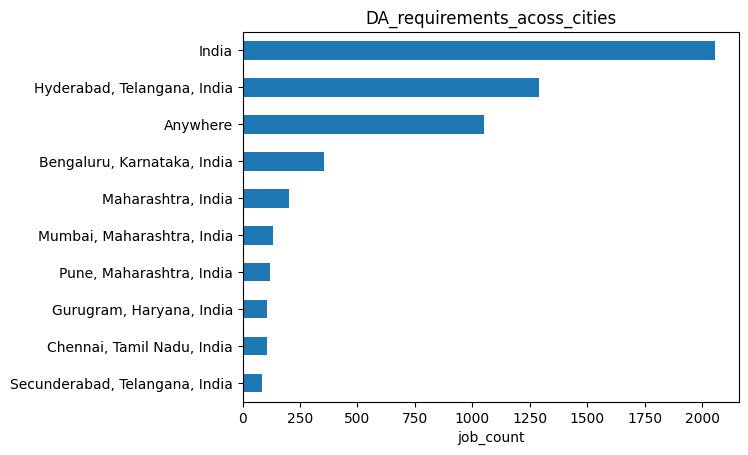

In [101]:
top_job_city = df_da_ind['job_location'].value_counts().to_frame().head(10)
top_job_city.reset_index(inplace=True)
top_job_city.plot(kind='barh', x= 'job_location', y = 'count')
plt.gca().invert_yaxis()
plt.ylabel('')
plt.xlabel('job_count')
plt.legend().set_visible(False)
plt.title('DA_requirements_acoss_cities')
plt.savefig('Charts/high_job_offering_indian_cities.png',dpi = 300,bbox_inches='tight' )
plt.show()



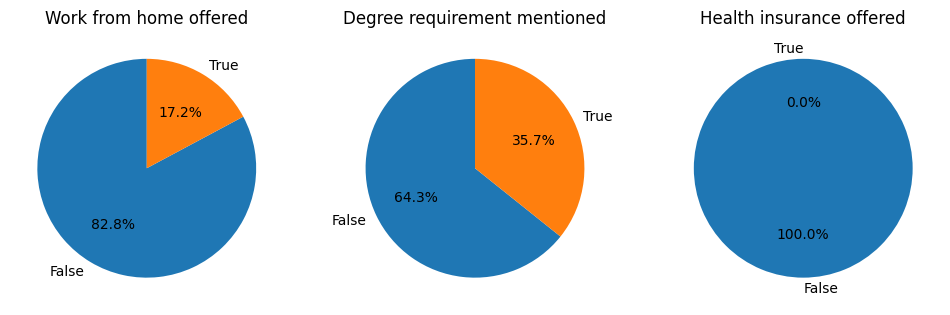

In [102]:
dict_column = {
    'job_work_from_home': 'Work from home offered',
    'job_no_degree_mention': 'Degree requirement mentioned',
    'job_health_insurance': 'Health insurance offered'
}

fig, ax = plt.subplots(1, 3, figsize=(12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_da_ind[column].value_counts().reindex([False, True], fill_value=0)
    
    ax[i].pie(
        counts,
        labels=['False', 'True'],
        autopct='%1.1f%%',
        startangle=90
    )
    ax[i].set_title(title)
fig.savefig('Charts/degree_vs_WFH.png',dpi = 300,bbox_inches='tight' )
plt.show()


In [11]:
df_da_ind.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_month_num,job_posted_month
178877,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via BeBee India,Full-time,False,India,2023-02-02 15:12:00,True,False,India,NaN,NaN,NaN,For a Client of Teamlease Digital,"[tableau, qlik, jira]","{'analyst_tools': ['tableau', 'qlik'], 'async'...",2,Feb
764881,Data Analyst,Data Analyst -Tableau Developer/BI,"Maharashtra, India",via Shine,Full-time,False,India,2023-12-28 20:32:04,True,False,India,NaN,NaN,NaN,Digit88 Technologies,"[sql, tableau, excel]","{'analyst_tools': ['tableau', 'excel'], 'progr...",12,Dec
105653,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via Recruit.net,Full-time,False,India,2023-01-27 00:13:28,False,False,India,NaN,NaN,NaN,Forbes Advisor,"[sql, python, r, bigquery]","{'cloud': ['bigquery'], 'programming': ['sql',...",1,Jan
694051,Data Analyst,Reference Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Full-time,False,India,2023-02-17 10:14:19,False,False,India,NaN,NaN,NaN,ICE,"[word, excel]","{'analyst_tools': ['word', 'excel']}",2,Feb
200432,Data Analyst,Tier 3 Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Full-time,False,India,2023-12-14 15:10:01,False,False,India,NaN,NaN,NaN,"RealPage, Inc.","[sql, power bi, excel, microstrategy, tableau]","{'analyst_tools': ['power bi', 'excel', 'micro...",12,Dec


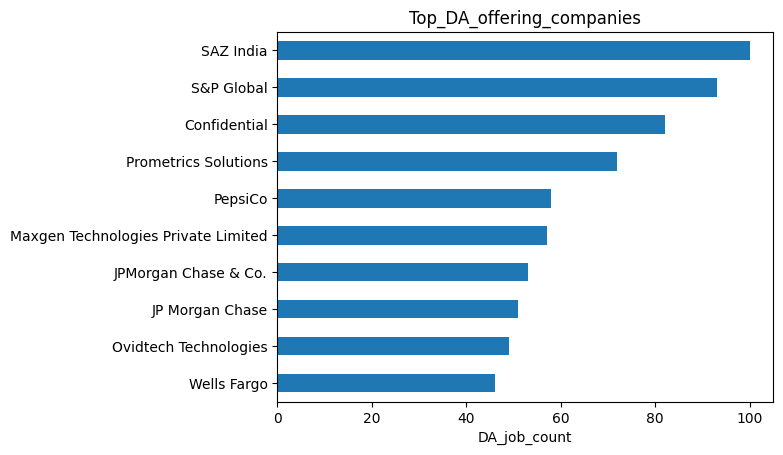

In [103]:
top_available_company = df_da_ind['company_name'].value_counts().head(10).to_frame()
top_available_company.reset_index(inplace=True)
top_available_company.plot(kind='barh',x= 'company_name', y= 'count')
plt.gca().invert_yaxis()
plt.ylabel('')
plt.xlabel('DA_job_count')
plt.legend().set_visible(False)
plt.title('Top_DA_offering_companies')
plt.savefig('Charts/top_DA_offering_comanies.png',dpi = 300,bbox_inches='tight' )
plt.show()


In [67]:
df.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_month_num,job_posted_month
162993,Data Scientist,Pricing Intelligence Analyst,"Dublin, Ireland",via BeBee Ireland,Full-time,False,Ireland,2023-06-04 16:19:45,False,False,Ireland,NaN,NaN,NaN,Veritas Technologies,"[python, r, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'pr...",6,Jun
274467,Data Engineer,Data Engineer,Dubai - United Arab Emirates,via LinkedIn,Full-time,False,United Arab Emirates,2023-04-25 07:27:50,True,False,United Arab Emirates,NaN,NaN,NaN,eMagine Solutions,"[sql, python, azure, ssis, git]","{'analyst_tools': ['ssis'], 'cloud': ['azure']...",4,Apr
18657,Data Analyst,Data Analyst,"San Salvador, El Salvador",via SmartRecruiters Job Search,Full-time,False,El Salvador,2023-09-22 14:01:02,True,False,El Salvador,NaN,NaN,NaN,Applaudo Studios,"[sql, r, python, gcp, powerpoint, excel, power...","{'analyst_tools': ['powerpoint', 'excel', 'pow...",9,Sep
380682,Data Scientist,2023 Graduate - Data Science - System Performa...,"Laurel, MD",via Snagajob,Full-time,False,Georgia,2023-03-12 18:44:25,False,True,United States,NaN,NaN,NaN,The Johns Hopkins University Applied Physics L...,"[python, r, apl, go, sql, tensorflow, numpy, p...","{'libraries': ['tensorflow', 'numpy', 'pytorch...",3,Mar
498966,Senior Data Analyst,Senior Data Analyst - Splunk,"San Luis Potosí, San Luis Potosi, Mexico",via LinkedIn,Full-time,False,Mexico,2023-07-08 11:21:34,False,False,Mexico,NaN,NaN,NaN,Honeywell,"[shell, python, linux, splunk]","{'analyst_tools': ['splunk'], 'os': ['linux'],...",7,Jul


In [68]:
df_ind = df[df['job_country']=='India'].copy()


In [69]:
df_ind_exp = df_ind.explode('job_skills').astype(str)
# df_ind_exp.sample()
# df_ind_exp[['job_title_short', 'job_skills']]
df_ind_exp=df_ind_exp.groupby(['job_title_short', 'job_skills']).size().reset_index(name='skill_count')
df_ind_exp.sort_values(by='skill_count', ascending=False, inplace=True)
job_title = df_ind_exp['job_title_short'].value_counts().head(4)
job_title = list(job_title.index)
job_title = sorted(job_title)
df_ind_exp


,job_title_short,job_skills,skill_count
641,Data Engineer,sql,12993
607,Data Engineer,python,11568
812,Data Scientist,python,9248
636,Data Engineer,spark,7157
483,Data Engineer,aws,6993
...,...,...,...
1639,Software Engineer,rshiny,1
1669,Software Engineer,symfony,1
7,Business Analyst,asp.net,1
5,Business Analyst,arch,1


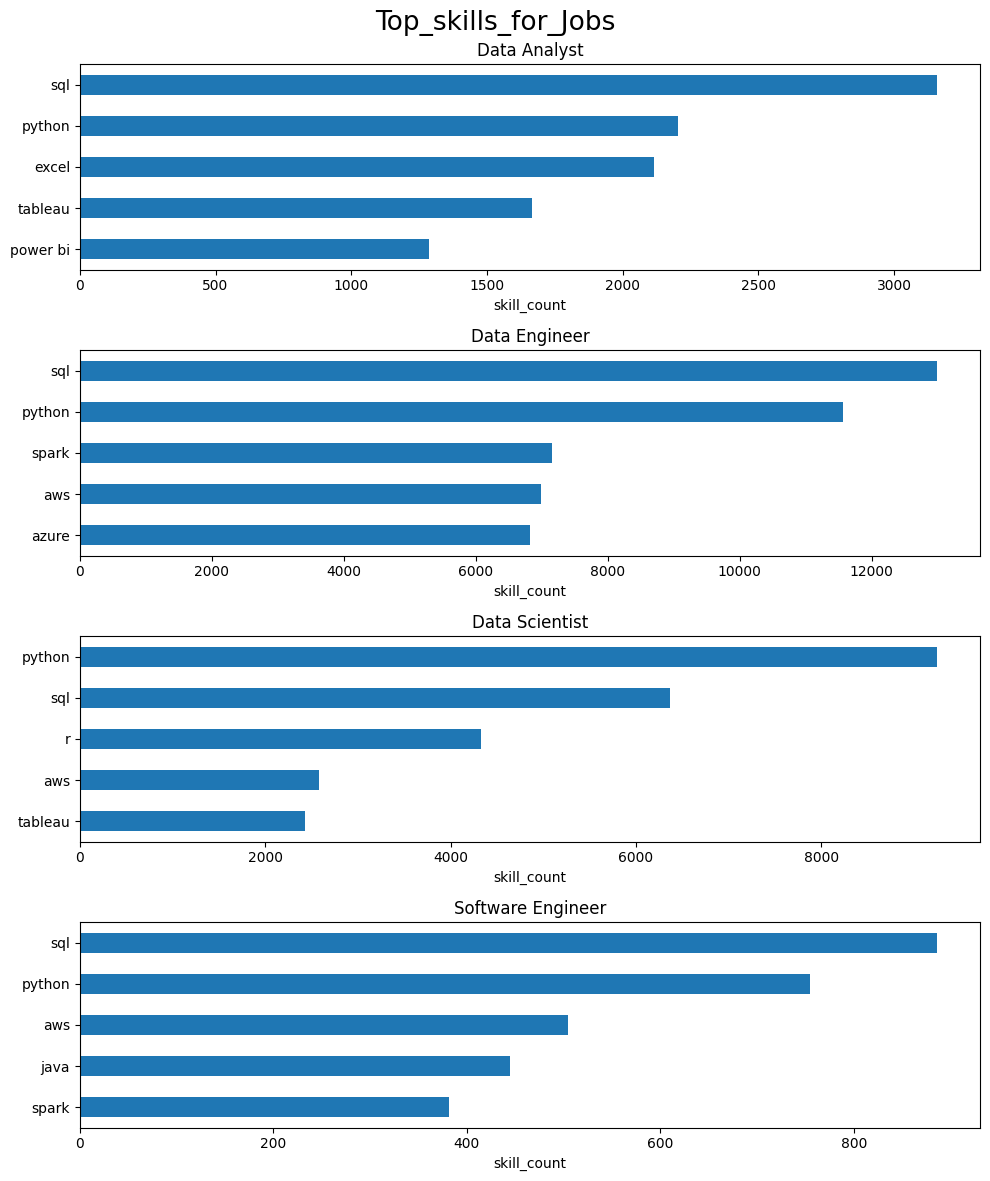

In [104]:
fig,ax = plt.subplots(len(job_title),1, figsize=(10,12 ))

for i, job in enumerate(job_title):
    skill_plot = df_ind_exp[df_ind_exp['job_title_short']== job].head()
    skill_plot.plot(kind='barh', x ='job_skills', y = 'skill_count',ax= ax[i], title=job)
    ax[i].invert_yaxis()
    ax[i].set_xlabel('skill_count')
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
plt.suptitle('Top_skills_for_Jobs', fontsize= 19)
plt.tight_layout()
fig.savefig('Charts/top_skills_for_DA_DE_DS.png',dpi = 300,bbox_inches='tight' )
plt.show()
    

In [89]:
df_ind_skills = df_ind.explode('job_skills').astype(str)
df_ind_skills = df_ind_skills['job_title_short'].value_counts().reset_index(name='total_skill_count')
df_ind_skills

,job_title_short,total_skill_count
0,Data Engineer,128144
1,Data Scientist,70549
2,Senior Data Engineer,33249
3,Data Analyst,23525
4,Senior Data Scientist,13920
5,Software Engineer,10751
6,Business Analyst,6292
7,Senior Data Analyst,4916
8,Machine Learning Engineer,4484
9,Cloud Engineer,1877


In [94]:
df_ind_exp

,job_title_short,job_skills,skill_count
641,Data Engineer,sql,12993
607,Data Engineer,python,11568
812,Data Scientist,python,9248
636,Data Engineer,spark,7157
483,Data Engineer,aws,6993
...,...,...,...
1639,Software Engineer,rshiny,1
1669,Software Engineer,symfony,1
7,Business Analyst,asp.net,1
5,Business Analyst,arch,1


In [96]:
ind_de = df_ind_exp[df_ind_exp['job_title_short'] == 'Data Engineer'].copy()
ind_de.loc['total_skills'] = ind_de['skill_count'].sum()
ind_de

,job_title_short,job_skills,skill_count
641,Data Engineer,sql,12993
607,Data Engineer,python,11568
636,Data Engineer,spark,7157
483,Data Engineer,aws,6993
484,Data Engineer,azure,6819
...,...,...,...
644,Data Engineer,sqlserver,1
649,Data Engineer,symfony,1
624,Data Engineer,sass,1
635,Data Engineer,solidity,1


In [92]:
skill_percent = df_ind_exp.merge(df_ind_skills, how='left', on='job_title_short')
skill_percent['percent_holds'] = 100 * skill_percent['skill_count']/skill_percent['total_skill_count']
skill_percent

,job_title_short,job_skills,skill_count,total_skill_count,percent_holds
0,Data Engineer,sql,12993,128144,10.139374
1,Data Engineer,python,11568,128144,9.027344
2,Data Scientist,python,9248,70549,13.108620
3,Data Engineer,spark,7157,128144,5.585123
4,Data Engineer,aws,6993,128144,5.457142
...,...,...,...,...,...
1694,Software Engineer,rshiny,1,10751,0.009301
1695,Software Engineer,symfony,1,10751,0.009301
1696,Business Analyst,asp.net,1,6292,0.015893
1697,Business Analyst,arch,1,6292,0.015893


In [ ]:
skill_percent[skill_percent['job_title_short']=='Data Analyst']

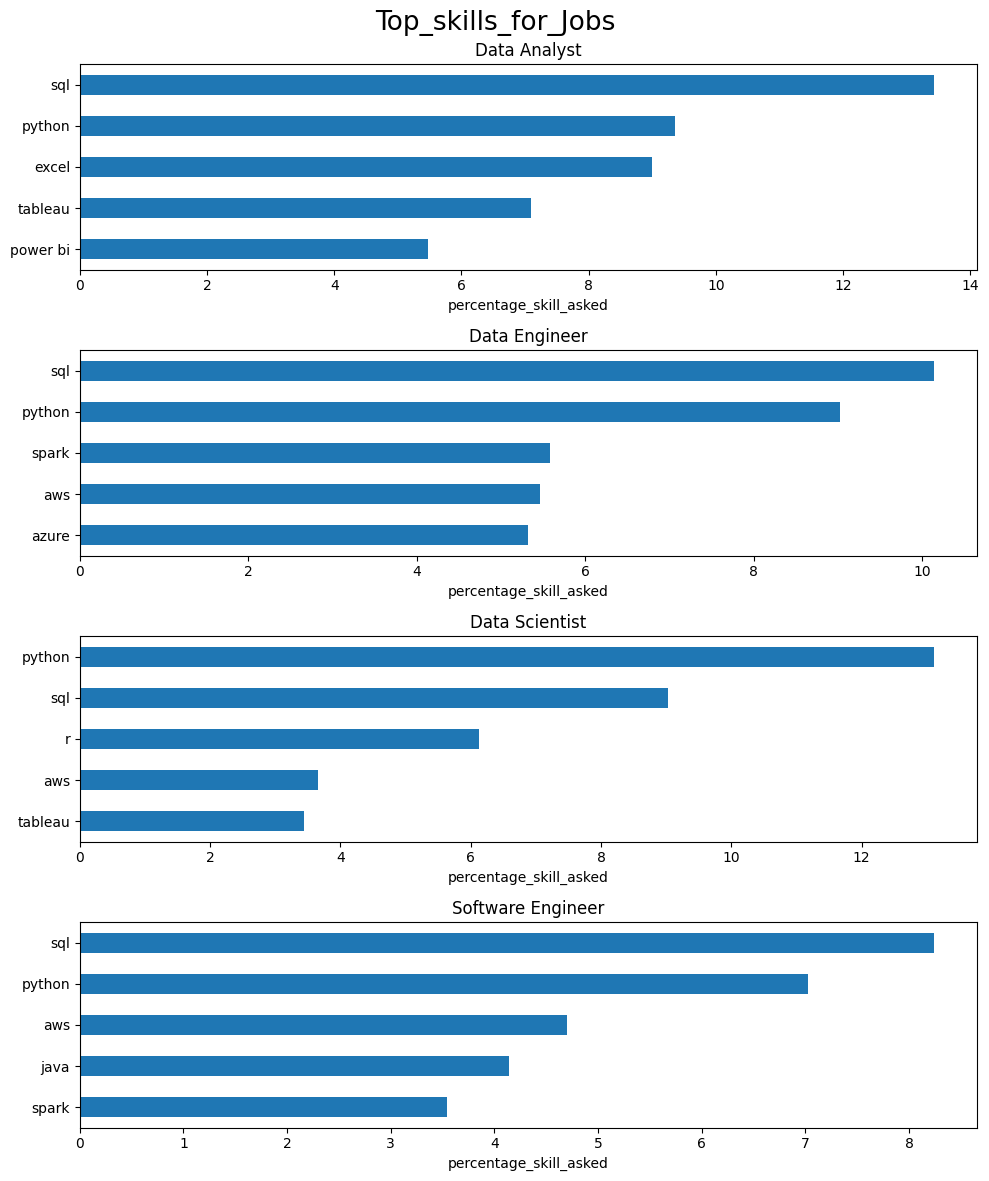

In [93]:
fig,ax = plt.subplots(len(job_title),1, figsize=(10,12 ))

for i, job in enumerate(job_title):
    skill_plot = skill_percent[skill_percent['job_title_short']== job].head()
    skill_plot.plot(kind='barh', x ='job_skills', y = 'percent_holds',ax= ax[i], title=job)
    ax[i].invert_yaxis()
    ax[i].set_xlabel('percentage_skill_asked')
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
plt.suptitle('Top_skills_for_Jobs', fontsize= 19)
plt.tight_layout()
plt.show()